# Blog post support for "Constraint forces for path in 3D"

I'll solve a few of the things I talk about in the post

In [3]:
{p1,p2}=RandomPoint[Sphere[],{2}];
Solve[{{a,b,c}.p1+d==0, {a,b,c}.p2==0},{a,b,c,d}]//InputForm

Solve::svars: Equations may not give solutions for all "solve" variables.

{{c -> 0. + 0.3998911137852679*a - 0.2628716901520667*b, 

 
>     d -> 0. + 0.9517484637723629*a - 0.5145497461933767*b}}

In [5]:
Solve[{{a,b,c}.{x1,y1,z1}+d==0, {a,b,c}.{x2,y2,z2}+d==0},{a,b,c,d}]//InputForm

Solve::svars: Equations may not give solutions for all "solve" variables.

{{c -> -((a*(x1 - x2))/(z1 - z2)) - (b*(y1 - y2))/(z1 - z2), 

 
>     d -> -((a*(x2*z1 - x1*z2))/(z1 - z2)) - (b*(y2*z1 - y1*z2))/(z1 - z2)}}

Single constraint with gravity along x

NDSolve::pdord: Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.

{x -> InterpolatingFunction[{{0., 1.}}, <>], y -> InterpolatingFunction[{{0., 1.}}, <>], 
 
>   z -> InterpolatingFunction[{{0., 1.}}, <>], 
 
>   lm -> InterpolatingFunction[{{0., 1.}}, <>]}
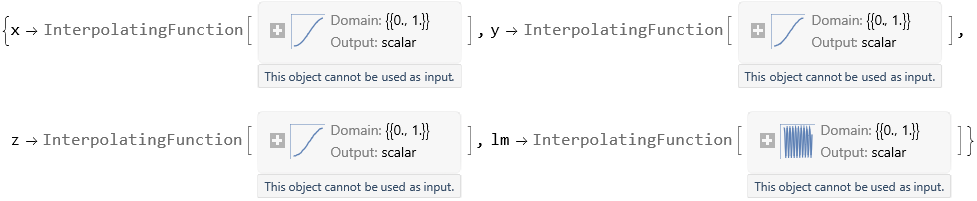

In [28]:
r[t_]:={x[t],y[t],z[t]};
constraint=Cross[r[t]-p1,p2-p1].Cross[r[t]-p1,p2-p1];
KE=1/2 r'[t].r'[t];
PE=4/3 Pi r[t].r[t];
L=KE-PE;
el[a_]:=D[L,a[t]]-D[L,a'[t],t]+lm[t] D[constraint,a[t]]==0;
sol=First[NDSolve[{el/@{x,y,z},
                   x[0]==p1[[1]]+.01,
                   y[0]==p1[[2]],
                   z[0]==p1[[3]],
                   x'[0]==0,
                   y'[0]==0,
                   z'[0]==0,
                   D[constraint,t,t]==0},{x,y,z,lm},{t,0,1}]]

In [35]:
Speak["I'm done"]

started at 12:22

-Graphics3D-
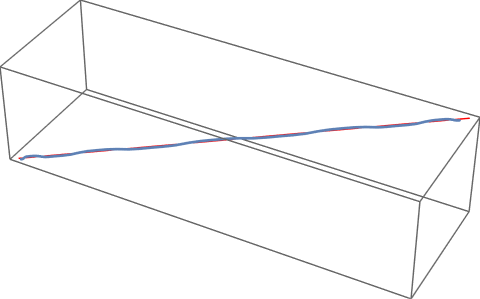

In [36]:
Show[Graphics3D[{Red,Line[{p1,p2}]}],ParametricPlot3D[r[t]/.sol,{t,0,1}]]

-Graphics-
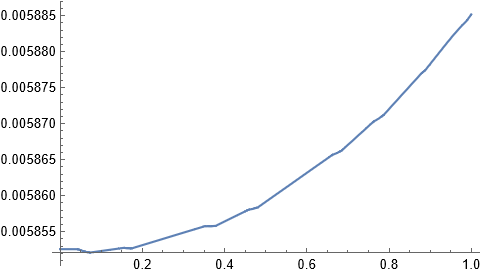

In [39]:
Plot[(Sqrt[constraint])/.sol,{t,0,1}]

NDSolve::pdord: Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.

{x -> InterpolatingFunction[{{0., 1.}}, <>], y -> InterpolatingFunction[{{0., 1.}}, <>], 
 
>   z -> InterpolatingFunction[{{0., 1.}}, <>], 
 
>   lm1 -> InterpolatingFunction[{{0., 1.}}, <>], 
 
>   lm2 -> InterpolatingFunction[{{0., 1.}}, <>]}
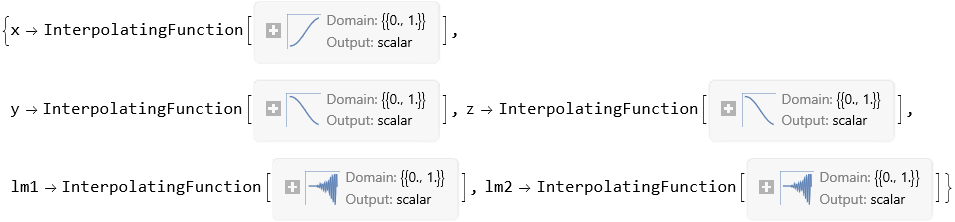

NDSolve::pdord: Some of the functions have zero differential order, so the equations will be solved as a system of differential-algebraic equations.

{x -> InterpolatingFunction[{{0., 3.}}, <>], y -> InterpolatingFunction[{{0., 3.}}, <>], 
 
>   z -> InterpolatingFunction[{{0., 3.}}, <>], 
 
>   lm1 -> InterpolatingFunction[{{0., 3.}}, <>], 
 
>   lm2 -> InterpolatingFunction[{{0., 3.}}, <>]}
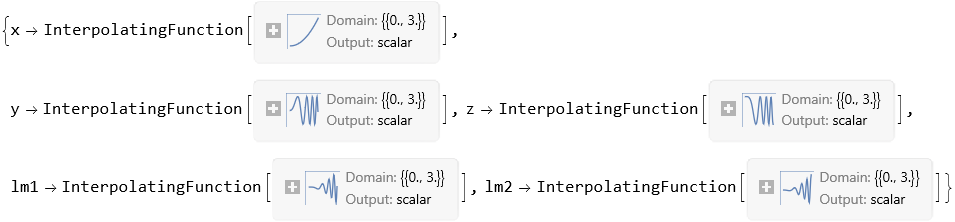

In [19]:
c1=y[t]-Sin[x[t]];
c2=z[t]-Cos[x[t]];
r[t_]:={x[t],y[t],z[t]};
KE=1/2 r'[t].r'[t];
PE=-9.8 x[t];
L=KE-PE;
el[a_]:=D[L,a[t]]-D[L,a'[t],t]+lm1[t] D[c1,a[t]]+lm2[t] D[c2,a[t]]==0;
sol=First[NDSolve[{el/@{x,y,z},
                   x[0]==0,
                   y[0]==0,
                   z[0]==1,
                   x'[0]==0,
                   y'[0]==0,
                   z'[0]==0,
                   D[c1,t,t]==0,
                   D[c2,t,t]==0},{x,y,z,lm1,lm2},{t,0,3}]]

-Graphics3D-
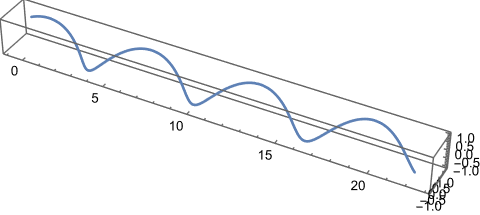

In [28]:
track=ParametricPlot3D[r[t]/.sol,{t,0,3}]

In [29]:
frames=Table[Show[track,Graphics3D[{Red,PointSize[0.05],Point[r[t]/.sol]}]],{t,0,3,.03}];

Manipulate[PaneSelector[{1 -> -Graphics3D-, 2 -> -Graphics3D-, 3 -> -Graphics3D-, 
 
>     4 -> -Graphics3D-, 5 -> -Graphics3D-, 6 -> -Graphics3D-, 7 -> -Graphics3D-, 
 
>     8 -> -Graphics3D-, 9 -> -Graphics3D-, 10 -> -Graphics3D-, 11 -> -Graphics3D-, 
 
>     12 -> -Graphics3D-, 13 -> -Graphics3D-, 14 -> -Graphics3D-, 15 -> -Graphics3D-, 
 
>     16 -> -Graphics3D-, 17 -> -Graphics3D-, 18 -> -Graphics3D-, 19 -> -Graphics3D-, 
 
>     20 -> -Graphics3D-, 21 -> -Graphics3D-, 22 -> -Graphics3D-, 23 -> -Graphics3D-, 
 
>     24 -> -Graphics3D-, 25 -> -Graphics3D-, 26 -> -Graphics3D-, 27 -> -Graphics3D-, 
 
>     28 -> -Graphics3D-, 29 -> -Graphics3D-, 30 -> -Graphics3D-, 31 -> -Graphics3D-, 
 
>     32 -> -Graphics3D-, 33 -> -Graphics3D-, 34 -> -Graphics3D-, 35 -> -Graphics3D-, 
 
>     36 -> -Graphics3D-, 37 -> -Graphics3D-, 38 -> -Graphics3D-, 39 -> -Graphics3D-, 
 
>     40 -> -Graphics3D-, 41 -> -Graphics3D-, 42 -> -Graphics3D-, 43 -> -Graphics3D-, 
 
>     44 -> -Graphics3D-, 45 -> -Graphics3D-, 46 -> -Graphics3D-, 47 -> -Graphics3D-, 
 
>     48 -> -Graphics3D-, 49 -> -Graphics3D-, 50 -> -Graphics3D-, 51 -> -Graphics3D-, 
 
>     52 -> -Graphics3D-, 53 -> -Graphics3D-, 54 -> -Graphics3D-, 55 -> -Graphics3D-, 
 
>     56 -> -Graphics3D-, 57 -> -Graphics3D-, 58 -> -Graphics3D-, 59 -> -Graphics3D-, 
 
>     60 -> -Graphics3D-, 61 -> -Graphics3D-, 62 -> -Graphics3D-, 63 -> -Graphics3D-, 
 
>     64 -> -Graphics3D-, 65 -> -Graphics3D-, 66 -> -Graphics3D-, 67 -> -Graphics3D-, 
 
>     68 -> -Graphics3D-, 69 -> -Graphics3D-, 70 -> -Graphics3D-, 71 -> -Graphics3D-, 
 
>     72 -> -Graphics3D-, 73 -> -Graphics3D-, 74 -> -Graphics3D-, 75 -> -Graphics3D-, 
 
>     76 -> -Graphics3D-, 77 -> -Graphics3D-, 78 -> -Graphics3D-, 79 -> -Graphics3D-, 
 
>     80 -> -Graphics3D-, 81 -> -Graphics3D-, 82 -> -Graphics3D-, 83 -> -Graphics3D-, 
 
>     84 -> -Graphics3D-, 85 -> -Graphics3D-, 86 -> -Graphics3D-, 87 -> -Graphics3D-, 
 
>     88 -> -Graphics3D-, 89 -> -Graphics3D-, 90 -> -Graphics3D-, 91 -> -Graphics3D-, 
 
>     92 -> -Graphics3D-, 93 -> -Graphics3D-, 94 -> -Graphics3D-, 95 -> -Graphics3D-, 
 
>     96 -> -Graphics3D-, 97 -> -Graphics3D-, 98 -> -Graphics3D-, 99 -> -Graphics3D-, 
 
>     100 -> -Graphics3D-, 101 -> -Graphics3D-}, Dynamic[i40], ImageSize -> All, 
 
>    Alignment -> Automatic, BaseStyle -> ListAnimateCore, 
 
>    TransitionDirection -> Horizontal, TransitionDuration -> 0.5, 
 
>    TransitionEffect -> Automatic], 
 
>   {{i40, 1, }, 1, 101, 1, AnimationRate -> Automatic, DisplayAllSteps -> True, 
 
>    AppearanceElements -> 
 
>     {ProgressSlider, PlayPauseButton, FasterSlowerButtons, DirectionButton}}, 
 
>   ControlType -> Animator, AppearanceElements -> None, 
 
>   DefaultBaseStyle -> ListAnimate, DefaultLabelStyle -> ListAnimateLabel, 
 
>   SynchronousUpdating -> True, Method -> 
 
>    {DynamicCore -> False, TemplateExpand -> True}, 
 
>   Bookmarks -> {min :> {i40 = 1}, max :> {i40 = 101}}]
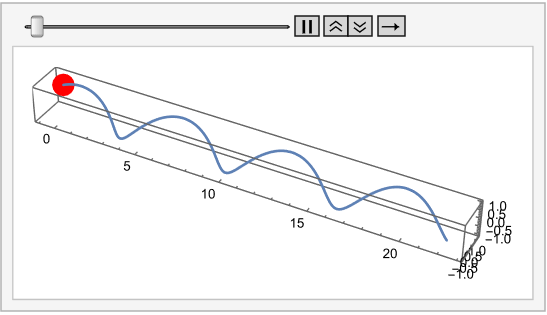

In [30]:
ListAnimate[frames]

In [34]:
Speak["I'm done"]

In [33]:
Export["C:\\Users\\arundquist\\Downloads\\helix with constraints.gif",frames]

C:\Users\arundquist\Downloads\helix with constraints.gif